In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("./hdata.csv")

               State  VotingPercentage
0  Baden-Württemberg              70.0
1            Bavaria              75.0
2             Berlin              65.0
3        Brandenburg              60.0
4             Bremen              55.0
Index(['State', 'VotingPercentage'], dtype='object')


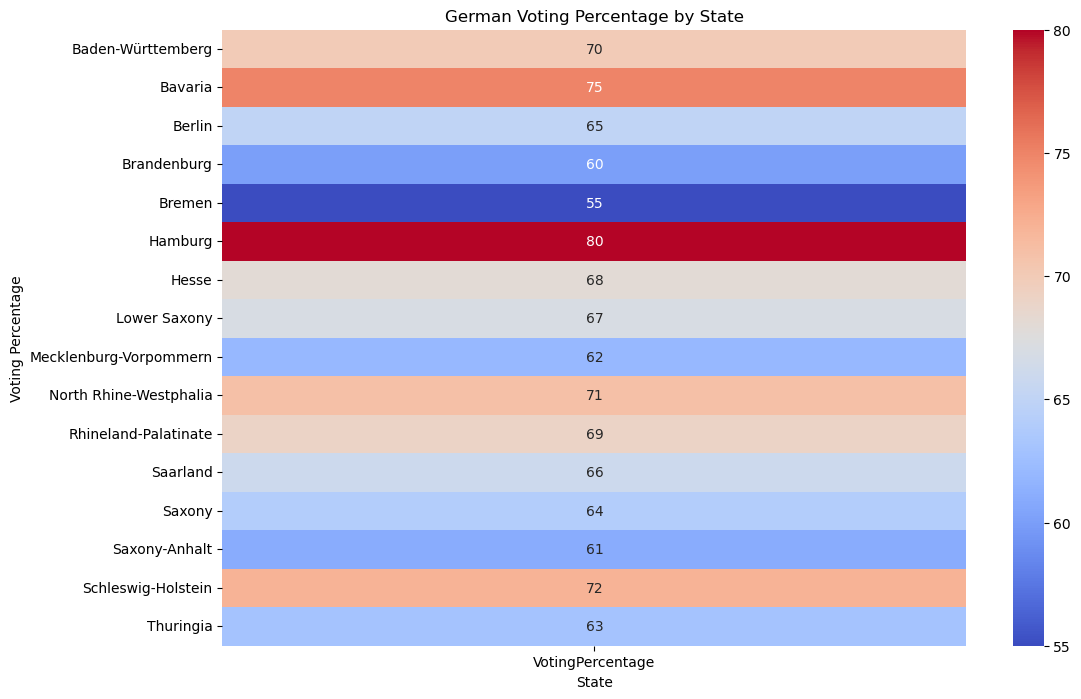

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./hdata.csv')

# Inspect the DataFrame
print(df.head())
print(df.columns)

# Set the index to 'State'
df.set_index('State', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True)

plt.title("German Voting Percentage by State")
plt.xlabel("State")
plt.ylabel("Voting Percentage")
plt.xticks(rotation=0)
plt.show()

